# Interpolation and difference function evaluation

In this notebook we will approximate Differential Equations with grid functions and, also, use such methods as tridiagonal matrix algorithm.

### Task 1

 $Solve \space \begin{array}{rcl} y''+ 2y'= 0 \\ y(0) = y(1) = 0 \end{array}$

We can solve this boundary value problem by ***Shooting Method***.

Let's denote it as follows:

1. Let $ y'' = f(t, y, y'),\space  y(0) = y_1, \space y(1) = y_2$ - boundary value problem.
2. Let $ y'' = f(t, y, y'),\space  y(0) = y_1, \space y'(0) = p $ - initial value problem.
3. Let $F(p) = y(1, p) - y_2$. 

If the boundary value problem has a solution $y(t)$, then $y(t)$ is also the unique solution $y(t; p^*)$ of the initial value problem where $p = y'(t_0)$, thus a is a root of $F$.

Root of $F$ can be found by line optimization methods, such as Bisection and Newton's method.

In [1]:
using Roots
using DifferentialEquations

function shooting_method(dydt, t, y₁, y₂, p=nothing)
    if p == nothing
        p = rand(-10:0.1:10)
    end
    
    function F(p)
        problem = ODEProblem(dydt, [y₁, p], (t[1], t[end]))
        y_sol = solve(problem)
        return y_sol(t[end])[1] - y₂
    end
    
    p = find_zero(F, p)

    problem = ODEProblem(dydt, [y₁, p], (t[1], t[end]))
    y_sol = solve(problem, solveat=t)
    
    return y_sol(t)[1, :], p
end

shooting_method (generic function with 2 methods)

In [2]:
f(y, s, t) = [y[2], -2*y[1]]
t = range(0, stop=3, length=1000)
y, p = shooting_method(f, t, 0, 0, 1)
print("p = $p")

p = 0.0

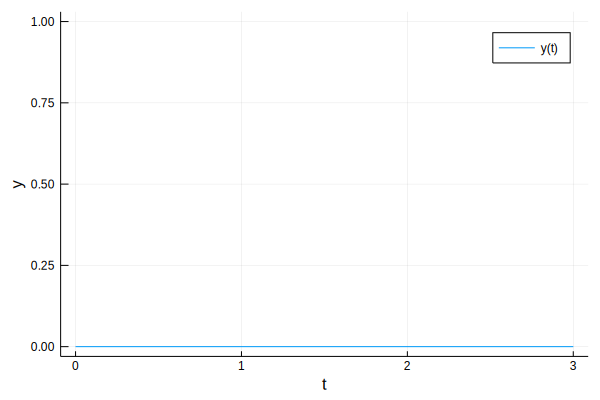

In [3]:
using Plots

plot(t, y, label="y(t)")
xlabel!("t")
ylabel!("y")

### Task 2

 $Solve \space \begin{array}{rcl} y''+ 2y'= 0 \\ y(0) = y(1) = 1 \end{array}$

In [69]:
f(y, s, t) = [y[2], -2*y[2]]
t = range(0, stop=3, length=1000)
y, p = shooting_method(f, t, 1, 2, 6)
print("p = $p")

p = 2.004970687617112

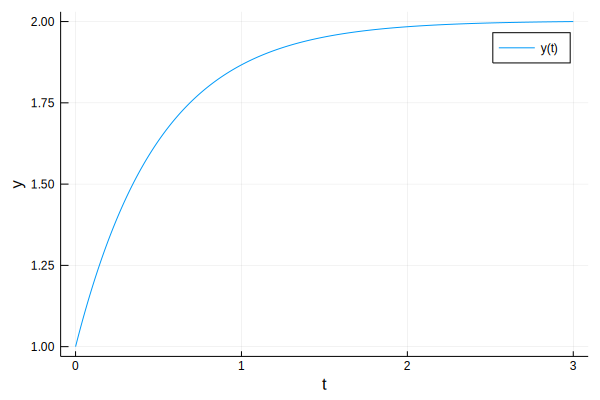

In [70]:
plot(t, y, label="y(t)")
xlabel!("t")
ylabel!("y")

$u_2(t)$ represents final result at $t = 1$, that, in our terms, $y(t)$ at $t = 1$, so it seems close to our solution.

Actually, I have pretty gif of out equation's evolving over time!

In [71]:
using Printf

f(y, s, t) = [y[2], -2*y[2]]

anim = @animate for t_end in range(0.1, stop=3, length=60)
    t = range(0, stop=t_end, length=1000)
    y, p = shooting_method(f, t, 1, 2, 0)
    plot(t, y, label="y(t)", xlims=(0, 3), ylims=(0.5, 1.5))
    xlabel!("t")
    ylabel!("y")
    title!(@sprintf "Time: %0.3f" t_end)
end

gif(anim, "task2.gif", fps = 3)

┌ Info: Saved animation to 
│   fn = C:\Users\а\PycharmProjects\DifferenceFunctionEvaluation\notebooks\task2.gif
└ @ Plots C:\Julia\packages\packages\Plots\h3o4c\src\animation.jl:95


Plots.AnimatedGif("C:\\Users\\а\\PycharmProjects\\DifferenceFunctionEvaluation\\notebooks\\task2.gif")

# Task 3

$\frac {\partial u}{\partial t} + sin(x) \frac {\partial u}{\partial x} = 0$

$u(0, x) = \begin{cases} 1, \space -1 \le x \le 1 
                      \\ 0, \space otherwise 
           \end{cases}$

We can approximate our derivatives using their definition:

$\frac {\partial u(t, x)}{\partial t} = \frac {u(t + \Delta t, x) - u(t, x)}{\Delta t}$

$\frac {\partial u(t, x)}{\partial x} = \frac {u(t, x + \Delta x) - u(t, x)}{\Delta x}$

$\frac {\partial u(t, x)}{\partial x} = \frac {u(t, x) - u(t, x - \Delta x)}{\Delta x}$

Now we can substitute them in our original equation and obtain:

$u(t, x) = u(t - \Delta t, x) - \frac {sin(x) \Delta t}{\Delta x} [u(t - \Delta t, x) - u(t - \Delta t, x - \Delta x) ]$

$u(t, x) = u(t - \Delta t, x) + \frac {sin(x) \Delta t}{\Delta x} [u(t - \Delta t, x) - u(t - \Delta t, x + \Delta x) ]$

In [103]:
Δx = 0.01
x_min = -3
x_max = 3

Δt = Δx
t_min = 0
t_max = 2

nₓ = ceil(Int64, (x_max - x_min) / Δx)
nₜ = ceil(Int64, (t_max - t_min) / Δt);

In [104]:
x₀ = range(x_min, stop=x_max, length=nₓ)
u = zeros(nₜ, nₓ);

In [105]:
function f(t, x)
    if sin(x₀[x]) < 0
        u[t, x] = u[t-1, x] + sin(x₀[x]) * (Δt/Δx) * (u[t-1,x] - u[t-1,x+1])
    else
        u[t, x] = u[t-1, x] - sin(x₀[x]) * (Δt/Δx) * (u[t-1,x] - u[t-1,x-1])
    end
end

f (generic function with 2 methods)

In [106]:
for t in range(1, stop=nₜ)
    for x in range(1, stop=nₓ)
        if t == 1 && (-1 ≤ x₀[x] ≤ 1)
            u[t,x] = 1
        elseif t == 1
            u[t, x] = 0
        else
            u[t, x] = f(t, x)
        end
    end
end


In [107]:
using Printf

anim = @animate for i in 1:10:nₜ
    plot(x₀, u[i, :], label="u(t, x)")
    title!(@sprintf "Time: %0.3lf" Δt*i)
    xlabel!("x")
    ylabel!("u(t, x)")
end

gif(anim, "task3.gif", fps=3)

┌ Info: Saved animation to 
│   fn = C:\Users\а\PycharmProjects\DifferenceFunctionEvaluation\notebooks\task3.gif
└ @ Plots C:\Julia\packages\packages\Plots\h3o4c\src\animation.jl:95


Plots.AnimatedGif("C:\\Users\\а\\PycharmProjects\\DifferenceFunctionEvaluation\\notebooks\\task3.gif")

In [110]:
using StatsBase

countmap(u[50, :])

Dict{Float64,Int64} with 31 entries:
  0.368066  => 2
  1.0       => 2
  1.0       => 2
  1.0       => 2
  1.0       => 2
  0.0       => 302
  0.99988   => 2
  0.999998  => 2
  1.0       => 2
  0.999999  => 2
  0.939749  => 2
  0.999991  => 2
  0.754009  => 2
  0.169707  => 2
  0.998746  => 2
  0.999966  => 2
  1.0       => 2
  0.974221  => 2
  1.0       => 2
  0.999601  => 2
  1.0       => 2
  1.0       => 2
  0.0422128 => 2
  1.0       => 2
  0.871752  => 2
  ⋮         => ⋮

# Task 4

$\frac {\partial u}{\partial t} + \frac {x}{1 + x^2} \frac {\partial u} {\partial x} = 0$

$u(0, x) = \begin{cases} 1, \space -1 \le x \le 0
                      \\ 2, \space 0 \le x \le 1
                      \\ 0, \space otherwise
           \end{cases}$

We can approximate our derivatives using their definition:

$\frac {\partial u(t, x)}{\partial t} = \frac {u(t + \Delta t, x) - u(t, x)}{\Delta t}$

$\frac {\partial u(t, x)}{\partial x} = \frac {u(t, x + \Delta x) - u(t, x)}{\Delta x}$

$\frac {\partial u(t, x)}{\partial x} = \frac {u(t, x) - u(t, x - \Delta x)}{\Delta x}$

Now we can substitute them in our original equation and obtain:

$
u(t, x) = u(t - \Delta t, x) - \frac {\Delta t}{\Delta x} \frac {x}{1 + x^2} [u(t - \Delta t, x) - u(t - \Delta t, x - \Delta x)]
$

$
u(t, x) = u(t - \Delta t, x) + \frac {\Delta t}{\Delta x} \frac {x}{1 + x^2} [u(t - \Delta t, x) - u(t - \Delta t, x + \Delta x)]
$

In [14]:
Δx = 0.01
x_min = -3
x_max = 3

Δt = 0.001
t_min = 0
t_max = 10

nₓ = ceil(Int64, (x_max - x_min) / Δx)
nₜ = ceil(Int64, (t_max - t_min) / Δt);

In [15]:
x₀ = range(x_min, stop=x_max, length=nₓ)
u = zeros(nₜ, nₓ);

In [16]:
function f(t, x)
    if x₀[x] < 0
        u[t-1, x] + x₀[x] * (Δt/Δx) / (1 + x₀[x]^2) * (u[t-1, x] - u[t-1, x+1])
    else
        u[t-1, x] - x₀[x] * (Δt/Δx) / (1 + x₀[x]^2) * (u[t-1, x] - u[t-1, x-1])
    end
end

f (generic function with 2 methods)

In [17]:
for t in range(1, stop=nₜ)
    for x in range(1, stop=nₓ)
        if t == 1 && (-1 ≤ x₀[x] ≤ 0)
            u[t,x] = 1
        elseif t == 1 && (0 ≤ x₀[x] ≤ 1)
            u[t, x] = 2
        elseif t == 1
            u[t, x] = 0
        else
            u[t, x] = f(t, x)
        end
    end
end

In [18]:
anim = @animate for i in 1:200:nₜ
    plot(x₀, u[i, :], label="u(t, x)", ylims=(0, 2.1))
    title!(@sprintf "Time: %0.3lf" Δt*i)
    xlabel!("x")
    ylabel!("u(t, x)")
end

gif(anim, "task4.gif", fps=5)

┌ Info: Saved animation to 
│   fn = C:\Users\а\PycharmProjects\DifferenceFunctionEvaluation\notebooks\task4.gif
└ @ Plots C:\Julia\packages\packages\Plots\h3o4c\src\animation.jl:95


Plots.AnimatedGif("C:\\Users\\а\\PycharmProjects\\DifferenceFunctionEvaluation\\notebooks\\task4.gif")

# Task 5.1


$\frac {\partial u}{\partial t} + 2u \frac {\partial u}{\partial x} = 0$

$u(0, x) = \begin{cases} 1, \space x \le 0
                      \\ 0, \space otherwise
           \end{cases}$

We can approximate our derivatives using their definition:

$\frac {\partial u(t, x)}{\partial t} = \frac {u(t + \Delta t, x) - u(t, x)}{\Delta t}$

$\frac {\partial u(t, x)}{\partial x} = \frac {u(t, x + \Delta x) - u(t, x)}{\Delta x}$

$\frac {\partial u(t, x)}{\partial x} = \frac {u(t, x) - u(t, x - \Delta x)}{\Delta x}$

Now we can substitute them in our original equation and obtain:

$
u(t, x) = u(t - \Delta t, x) - 2u(t - \Delta t, x) \frac {\Delta t}{\Delta x} 
[u(t - \Delta t, x) - u(t - \Delta t, x - \Delta x)]
$

$
u(t, x) = u(t - \Delta t, x) + 2u(t - \Delta t, x)\frac {\Delta t}{\Delta x} 
[u(t - \Delta t, x) - u(t - \Delta t, x + \Delta x)]
$

In [19]:
Δx = 0.01
x_min = -2
x_max = 2

Δt = 0.001
t_min = 0
t_max = 10

nₓ = ceil(Int64, (x_max - x_min) / Δx)
nₜ = ceil(Int64, (t_max - t_min) / Δt);

In [20]:
x₀ = range(x_min, stop=x_max, length=nₓ)
u = zeros(nₜ, nₓ);

In [21]:
function f(t, x)
    u[t-1, x] - 2u[t-1, x] * (Δt/Δx) * (u[t-1, x] - u[t-1, x-1])
end

f (generic function with 2 methods)

In [22]:
for t in range(1, stop=nₜ)
    for x in range(2, stop=nₓ)
        if t == 1 && x₀[x] ≤ 0
            u[t,x] = 1
        elseif t == 1
            u[t, x] = 0
        else
            u[t, x] = f(t, x)
        end
    end
end

In [23]:
anim = @animate for i in 1:200:nₜ
    plot(x₀, u[i, :], label="u(t, x)", ylims=(0, 1.1))
    title!(@sprintf "Time: %0.3lf" Δt*i)
    xlabel!("x")
    ylabel!("u(t, x)")
end

gif(anim, "task5_1.gif", fps=5)

┌ Info: Saved animation to 
│   fn = C:\Users\а\PycharmProjects\DifferenceFunctionEvaluation\notebooks\task5_1.gif
└ @ Plots C:\Julia\packages\packages\Plots\h3o4c\src\animation.jl:95


Plots.AnimatedGif("C:\\Users\\а\\PycharmProjects\\DifferenceFunctionEvaluation\\notebooks\\task5_1.gif")

# Task 5.2

$\frac {\partial u}{\partial t} + 2u \frac {\partial u}{\partial x} = 0$

$u(0, x) = \begin{cases} 1, \space x \ge 0
                      \\ 0, \space otherwise
           \end{cases}$

We can approximate our derivatives using their definition:

$\frac {\partial u(t, x)}{\partial t} = \frac {u(t + \Delta t, x) - u(t, x)}{\Delta t}$

$\frac {\partial u(t, x)}{\partial x} = \frac {u(t, x + \Delta x) - u(t, x)}{\Delta x}$

$\frac {\partial u(t, x)}{\partial x} = \frac {u(t, x) - u(t, x - \Delta x)}{\Delta x}$

Now we can substitute them in our original equation and obtain:

$
u(t, x) = u(t - \Delta t, x) - 2u(t - \Delta t, x) \frac {\Delta t}{\Delta x} 
[u(t - \Delta t, x) - u(t - \Delta t, x - \Delta x)]
$

$
u(t, x) = u(t - \Delta t, x) + 2u(t - \Delta t, x)\frac {\Delta t}{\Delta x} 
[u(t - \Delta t, x) - u(t - \Delta t, x + \Delta x)]
$

In [24]:
Δx = 0.01
x_min = -2
x_max = 2

Δt = 0.001
t_min = 0
t_max = 10

nₓ = ceil(Int64, (x_max - x_min) / Δx)
nₜ = ceil(Int64, (t_max - t_min) / Δt);

In [25]:
x₀ = range(x_min, stop=x_max, length=nₓ)
u = zeros(nₜ, nₓ);

In [26]:
function f(t, x)
    u[t-1, x] - 2u[t-1, x] * (Δt/Δx) * (u[t-1, x] - u[t-1, x-1])
end

f (generic function with 2 methods)

In [27]:
for t in range(1, stop=nₜ)
    for x in range(2, stop=nₓ)
        if t == 1 && x₀[x] ≥ 0
            u[t,x] = 1
        elseif t == 1
            u[t, x] = 0
        else
            u[t, x] = f(t, x)
        end
    end
end

In [28]:
anim = @animate for i in 1:200:nₜ
    plot(x₀, u[i, :], label="u(t, x)", ylims=(0, 1.1))
    title!(@sprintf "Time: %0.3lf" Δt*i)
    xlabel!("x")
    ylabel!("u(t, x)")
end

gif(anim, "task5_2.gif", fps=5)

┌ Info: Saved animation to 
│   fn = C:\Users\а\PycharmProjects\DifferenceFunctionEvaluation\notebooks\task5_2.gif
└ @ Plots C:\Julia\packages\packages\Plots\h3o4c\src\animation.jl:95


Plots.AnimatedGif("C:\\Users\\а\\PycharmProjects\\DifferenceFunctionEvaluation\\notebooks\\task5_2.gif")

# Task 6.1

$\frac {\partial u}{\partial t} + sin(x) \frac {\partial u}{\partial x} = \epsilon \frac {\partial^2 u}{\partial x^2}$

$u(0, x) = \begin{cases} 1, \space -1 \le x \le 1 
                      \\ 0, \space otherwise 
           \end{cases}$
           

We can approximate our derivatives using their definition:

$\frac {\partial u(t, x)}{\partial t} = \frac {u(t + \Delta t, x) - u(t, x)}{\Delta t}$

$\frac {\partial u(t, x)}{\partial x} = \frac {u(t, x + \Delta x) - u(t, x)}{\Delta x}$

$\frac {\partial u(t, x)}{\partial x} = \frac {u(t, x) - u(t, x - \Delta x)}{\Delta x}$

$\frac {\partial^2 u(t, x)}{\partial x^2} =
    \frac {u(t, x + \Delta x) - 2u(t, x) + u(t, x - \Delta x)}{\Delta x^2}$

Now we can substitute them in our original equation and obtain:

$
u(t, x) = u(t-\Delta t, x)(1 + sin(x) \frac {\Delta t}{\Delta x}) 
        - sin(x) \frac {\Delta t}{\Delta x} u(t-\Delta t, x+\Delta x)
        + \epsilon \frac {\Delta t}{\Delta x^2}[u(t-\Delta t, x+\Delta x) - 2u(t-\Delta t, x) + u(t-\Delta t, x-\Delta x)]
$

$
u(t, x) = u(t-\Delta t, x)(1 - sin(x) \frac {\Delta t}{\Delta x}) 
        + sin(x) \frac {\Delta t}{\Delta x} u(t-\Delta t, x-\Delta x)
        + \epsilon \frac {\Delta t}{\Delta x^2}[u(t-\Delta t, x+\Delta x) - 2u(t-\Delta t, x) + u(t-\Delta t, x-\Delta x)]
$

In [29]:
Δx = 0.01
x_min = -4
x_max = 4

Δt = 0.005
t_min = 0
t_max = 5

ϵ = 0.01

nₓ = ceil(Int64, (x_max - x_min) / Δx)
nₜ = ceil(Int64, (t_max - t_min) / Δt);

In [30]:
x₀ = range(x_min, stop=x_max, length=nₓ)
u = zeros(nₜ, nₓ);

In [31]:
function f(t, x)
    if sin(x₀[x]) < 0
        u[t-1, x] * (1 + sin(x₀[x]) * Δt/Δx) - sin(x₀[x]) * (Δt/Δx) * u[t-1, x+1] +
            ϵ*Δt/(Δx^2) * (u[t-1, x+1] - 2u[t-1, x] + u[t-1, x-1])
    else
        u[t-1, x] * (1 - sin(x₀[x]) * Δt/Δx) + sin(x₀[x]) * (Δt/Δx) * u[t-1, x-1] +
            ϵ*Δt/(Δx^2) * (u[t-1, x+1] - 2u[t-1, x] + u[t-1, x-1])
    end
end

f (generic function with 2 methods)

In [32]:
for t in range(1, stop=nₜ)
    for x in range(2, stop=nₓ-1)
        if t == 1 && (-1 ≤ x₀[x] ≤ 1)
            u[t, x] = 1
        elseif t == 1
            u[t, x] = 0
        else
            u[t, x] = f(t, x)
        end
    end
end

In [33]:
anim = @animate for i in 1:10
    plot(x₀, u[i, :], label="u(t, x)", ylims=(-5, 5))
    title!(@sprintf "Time: %0.3lf" Δt*i)
    xlabel!("x")
    ylabel!("u(t, x)")
end

gif(anim, "task6_1.gif", fps=1)

┌ Info: Saved animation to 
│   fn = C:\Users\а\PycharmProjects\DifferenceFunctionEvaluation\notebooks\task6_1.gif
└ @ Plots C:\Julia\packages\packages\Plots\h3o4c\src\animation.jl:95


Plots.AnimatedGif("C:\\Users\\а\\PycharmProjects\\DifferenceFunctionEvaluation\\notebooks\\task6_1.gif")

# Task 6.2

$\frac {\partial u}{\partial t} + sin(x) \frac {\partial u}{\partial x} = \epsilon \frac {\partial^2 u}{\partial x^2}$

$u(0, x) = \begin{cases} 1, \space -1 \le x \le 1 
                      \\ 0, \space otherwise 
           \end{cases}$
           
$\begin{array}{lcr} 
    u(t, -3) = 2
 \\ u(t, 3) = 2
 \end{array}$ 


We can approximate our derivatives using their definition:

$\frac {\partial u(t, x)}{\partial t} = \frac {u(t + \Delta t, x) - u(t, x)}{\Delta t}$

$\frac {\partial u(t, x)}{\partial x} = \frac {u(t, x + \Delta x) - u(t, x)}{\Delta x}$

$\frac {\partial u(t, x)}{\partial x} = \frac {u(t, x) - u(t, x - \Delta x)}{\Delta x}$

$\frac {\partial^2 u(t, x)}{\partial x^2} =
    \frac {u(t, x + \Delta x) - 2u(t, x) + u(t, x - \Delta x)}{\Delta x^2}$

Now we can substitute them in our original equation and obtain:

$
u(t, x) = u(t-\Delta t, x)(1 + sin(x) \frac {\Delta t}{\Delta x}) 
        - sin(x) \frac {\Delta t}{\Delta x} u(t-\Delta t, x+\Delta x)
        + \epsilon \frac {\Delta t}{\Delta x^2}[u(t-\Delta t, x+\Delta x) - 2u(t-\Delta t, x) + u(t-\Delta t, x-\Delta x)]
$

$
u(t, x) = u(t-\Delta t, x)(1 - sin(x) \frac {\Delta t}{\Delta x}) 
        + sin(x) \frac {\Delta t}{\Delta x} u(t-\Delta t, x-\Delta x)
        + \epsilon \frac {\Delta t}{\Delta x^2}[u(t-\Delta t, x+\Delta x) - 2u(t-\Delta t, x) + u(t-\Delta t, x-\Delta x)]
$

In [34]:
Δx = 0.01
x_min = -4
x_max = 4

Δt = 0.005
t_min = 0
t_max = 5

ϵ = 0.01

nₓ = ceil(Int64, (x_max - x_min) / Δx)
nₜ = ceil(Int64, (t_max - t_min) / Δt);

In [35]:
x₀ = range(x_min, stop=x_max, length=nₓ)
u = zeros(nₜ, nₓ)
u[:, 1] = u[:, end] = repeat([2], nₜ);

In [36]:
function f(t, x)
    if sin(x₀[x]) < 0
        u[t-1, x] * (1 + sin(x₀[x]) * Δt/Δx) - sin(x₀[x]) * (Δt/Δx) * u[t-1, x+1] +
            ϵ*Δt/(Δx^2) * (u[t-1, x+1] - 2u[t-1, x] + u[t-1, x-1])
    else
        u[t-1, x] * (1 - sin(x₀[x]) * Δt/Δx) + sin(x₀[x]) * (Δt/Δx) * u[t-1, x-1] +
            ϵ*Δt/(Δx^2) * (u[t-1, x+1] - 2u[t-1, x] + u[t-1, x-1])
    end
end

f (generic function with 2 methods)

In [37]:
for t in range(1, stop=nₜ)
    for x in range(2, stop=nₓ-1)
        if t == 1 && (-1 ≤ x₀[x] ≤ 1)
            u[t, x] = 1
        elseif t == 1
            u[t, x] = 0
        else
            u[t, x] = f(t, x)
        end
    end
end

In [38]:
anim = @animate for i in 1:10
    plot(x₀, u[i, :], label="u(t, x)", ylims=(-5, 5))
    title!(@sprintf "Time: %0.3lf" Δt*i)
    xlabel!("x")
    ylabel!("u(t, x)")
end

gif(anim, "task6_2.gif", fps=1)

┌ Info: Saved animation to 
│   fn = C:\Users\а\PycharmProjects\DifferenceFunctionEvaluation\notebooks\task6_2.gif
└ @ Plots C:\Julia\packages\packages\Plots\h3o4c\src\animation.jl:95


Plots.AnimatedGif("C:\\Users\\а\\PycharmProjects\\DifferenceFunctionEvaluation\\notebooks\\task6_2.gif")

# Task 7


$\frac {\partial u}{\partial t} + 2u \frac {\partial u}{\partial x} = \epsilon \frac{\partial^2 u}{\partial x^2}$

$u(0, x) = \begin{cases} 1, \space -1 \le x \le 0
                      \\ 0, \space otherwise
           \end{cases}$
           
$\begin{array}{lcr} 
    u(t, -1) = 0
 \\ u(t, 1) = 2
 \end{array}$            

We can approximate our derivatives using their definition:

$\frac {\partial u(t, x)}{\partial t} = \frac {u(t + \Delta t, x) - u(t, x)}{\Delta t}$

$\frac {\partial u(t, x)}{\partial x} = \frac {u(t, x + \Delta x) - u(t, x)}{\Delta x}$

$\frac {\partial u(t, x)}{\partial x} = \frac {u(t, x) - u(t, x - \Delta x)}{\Delta x}$

$\frac {\partial^2 u(t, x)}{\partial x^2} =
    \frac {u(t, x + \Delta x) - 2u(t, x) + u(t, x - \Delta x)}{\Delta x^2}$

Now we can substitute them in our original equation and obtain:

$
u(t, x) = u(t-\Delta t, x)(1 + 2u(t-\Delta t, x) \frac {\Delta t}{\Delta x}) 
        - 2u(t-\Delta t, x) \frac {\Delta t}{\Delta x} u(t-\Delta t, x+\Delta x)
        + \epsilon \frac {\Delta t}{\Delta x^2}[u(t-\Delta t, x+\Delta x) - 2u(t-\Delta t, x) + u(t-\Delta t, x-\Delta x)]
$

$
u(t, x) = u(t-\Delta t, x)(1 - 2u(t-\Delta t, x) \frac {\Delta t}{\Delta x}) 
        + 2u(t-\Delta t, x) \frac {\Delta t}{\Delta x} u(t-\Delta t, x-\Delta x)
        + \epsilon \frac {\Delta t}{\Delta x^2}[u(t-\Delta t, x+\Delta x) - 2u(t-\Delta t, x) + u(t-\Delta t, x-\Delta x)]
$

In [39]:
Δx = 0.01
x_min = -1
x_max = 1

Δt = 0.001
t_min = 0
t_max = 2

ϵ = 0.01

nₓ = ceil(Int64, (x_max - x_min) / Δx)
nₜ = ceil(Int64, (t_max - t_min) / Δt);

In [40]:
x₀ = range(x_min, stop=x_max, length=nₓ)
u = zeros(nₜ, nₓ)
u[:, 1] = repeat([0], nₜ)
u[:, end] = repeat([2], nₜ);

In [41]:
function f(t, x)
    if u[t-1, x] < 0
        u[t-1, x] * (1 + 2u[t-1, x] * Δt/Δx) - 2u[t-1, x] * (Δt/Δx) * u[t-1, x+1] +
            ϵ*Δt/(Δx^2) * (u[t-1, x+1] - 2u[t-1, x] + u[t-1, x-1])
    else
        u[t-1, x] * (1 - 2u[t-1, x] * Δt/Δx) + 2u[t-1, x] * (Δt/Δx) * u[t-1, x-1] +
            ϵ*Δt/(Δx^2) * (u[t-1, x+1] - 2u[t-1, x] + u[t-1, x-1])
    end
end

f (generic function with 2 methods)

In [42]:
for t in range(1, stop=nₜ)
    for x in range(2, stop=nₓ-1)
        if t == 1 && (-1 ≤ x₀[x] ≤ 0)
            u[t, x] = 1
        elseif t == 1
            u[t, x] = 0
        else
            u[t, x] = f(t, x)
        end
    end
end

In [43]:
anim = @animate for i in 1:50:nₜ
    plot(x₀, u[i, :], label="u(t, x)")
    title!(@sprintf "Time: %0.3lf" Δt*i)
    xlabel!("x")
    ylabel!("u(t, x)")
end

gif(anim, "task7.gif", fps=2)

┌ Info: Saved animation to 
│   fn = C:\Users\а\PycharmProjects\DifferenceFunctionEvaluation\notebooks\task7.gif
└ @ Plots C:\Julia\packages\packages\Plots\h3o4c\src\animation.jl:95


Plots.AnimatedGif("C:\\Users\\а\\PycharmProjects\\DifferenceFunctionEvaluation\\notebooks\\task7.gif")

# Task 8

$\frac {\partial u}{\partial t} + 2u \frac {\partial u}{\partial x} = \epsilon \frac{\partial^2 u}{\partial x^2}$

$u(0, x) = H(x) = \begin{cases} 0, \space x < 0
                      \\ 1, \space x \ge 0
                  \end{cases}$
           
$\begin{array}{lcr} 
    u(t, -2) = 0
 \\ u(t, 2) = 1
 \end{array}$    

In [44]:
Δx = 0.01
x_min = -2
x_max = 2

Δt = 0.001
t_min = 0
t_max = 2

ϵ = 0.01

nₓ = ceil(Int64, (x_max - x_min) / Δx)
nₜ = ceil(Int64, (t_max - t_min) / Δt);

In [45]:
x₀ = range(x_min, stop=x_max, length=nₓ)
u = zeros(nₜ, nₓ)
u[:, 1] = repeat([0], nₜ)
u[:, end] = repeat([1], nₜ);

In [46]:
function f(t, x)
    if u[t-1, x] < 0
        u[t-1, x] * (1 + 2u[t-1, x] * Δt/Δx) - 2u[t-1, x] * (Δt/Δx) * u[t-1, x+1] +
            ϵ*Δt/(Δx^2) * (u[t-1, x+1] - 2u[t-1, x] + u[t-1, x-1])
    else
        u[t-1, x] * (1 - 2u[t-1, x] * Δt/Δx) + 2u[t-1, x] * (Δt/Δx) * u[t-1, x-1] +
            ϵ*Δt/(Δx^2) * (u[t-1, x+1] - 2u[t-1, x] + u[t-1, x-1])
    end
end

f (generic function with 2 methods)

In [47]:
for t in range(1, stop=nₜ)
    for x in range(2, stop=nₓ-1)
        if t == 1 && x₀[x] ≥ 0
            u[t, x] = 1
        elseif t == 1
            u[t, x] = 0
        else
            u[t, x] = f(t, x)
        end
    end
end

In [48]:
anim = @animate for i in 1:50:nₜ
    plot(x₀, u[i, :], label="u(t, x)")
    title!(@sprintf "Time: %0.3lf" Δt*i)
    xlabel!("x")
    ylabel!("u(t, x)")
end

gif(anim, "task8.gif", fps=2)

┌ Info: Saved animation to 
│   fn = C:\Users\а\PycharmProjects\DifferenceFunctionEvaluation\notebooks\task8.gif
└ @ Plots C:\Julia\packages\packages\Plots\h3o4c\src\animation.jl:95


Plots.AnimatedGif("C:\\Users\\а\\PycharmProjects\\DifferenceFunctionEvaluation\\notebooks\\task8.gif")

# Task 9

$\frac {\partial u}{\partial t} + 2u \frac {\partial u}{\partial x} = \epsilon \frac{\partial^2 u}{\partial x^2}$

$u(0, x) = H(-x) = \begin{cases} 0, \space x > 0
                      \\ 1, \space x \le 0
                  \end{cases}$
           
$\begin{array}{lcr} 
    u(t, -2) = 1
 \\ u(t, 2) = 0
 \end{array}$   

In [49]:
Δx = 0.01
x_min = -2
x_max = 2

Δt = 0.001
t_min = 0
t_max = 2

ϵ = 0.01

nₓ = ceil(Int64, (x_max - x_min) / Δx)
nₜ = ceil(Int64, (t_max - t_min) / Δt);

In [50]:
x₀ = range(x_min, stop=x_max, length=nₓ)
u = zeros(nₜ, nₓ)
u[:, 1] = repeat([1], nₜ)
u[:, end] = repeat([0], nₜ);

In [51]:
function f(t, x)
    if u[t-1, x] < 0
        u[t-1, x] * (1 + 2u[t-1, x] * Δt/Δx) - 2u[t-1, x] * (Δt/Δx) * u[t-1, x+1] +
            ϵ*Δt/(Δx^2) * (u[t-1, x+1] - 2u[t-1, x] + u[t-1, x-1])
    else
        u[t-1, x] * (1 - 2u[t-1, x] * Δt/Δx) + 2u[t-1, x] * (Δt/Δx) * u[t-1, x-1] +
            ϵ*Δt/(Δx^2) * (u[t-1, x+1] - 2u[t-1, x] + u[t-1, x-1])
    end
end

f (generic function with 2 methods)

In [52]:
for t in range(1, stop=nₜ)
    for x in range(2, stop=nₓ-1)
        if t == 1 && x₀[x] ≤ 0
            u[t, x] = 1
        elseif t == 1
            u[t, x] = 0
        else
            u[t, x] = f(t, x)
        end
    end
end

In [53]:
anim = @animate for i in 1:50:nₜ
    plot(x₀, u[i, :], label="u(t, x)")
    title!(@sprintf "Time: %0.3lf" Δt*i)
    xlabel!("x")
    ylabel!("u(t, x)")
end

gif(anim, "task9.gif", fps=2)

┌ Info: Saved animation to 
│   fn = C:\Users\а\PycharmProjects\DifferenceFunctionEvaluation\notebooks\task9.gif
└ @ Plots C:\Julia\packages\packages\Plots\h3o4c\src\animation.jl:95


Plots.AnimatedGif("C:\\Users\\а\\PycharmProjects\\DifferenceFunctionEvaluation\\notebooks\\task9.gif")